In [1]:
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy

from mpl_toolkits.mplot3d import Axes3D
from scipy.special import airy
from matplotlib import cm
from qutip import *
from funcs import *


In [2]:
%matplotlib inline

In [3]:
N= 50

# States
vac = basis(N,0)

fockone = basis(N,1)
focktwo = basis(N,2)

coher = coherent(N, 1)

sqzvac = squeeze(N, 0.5) * vac

Text(0.5, 0, 'label text')

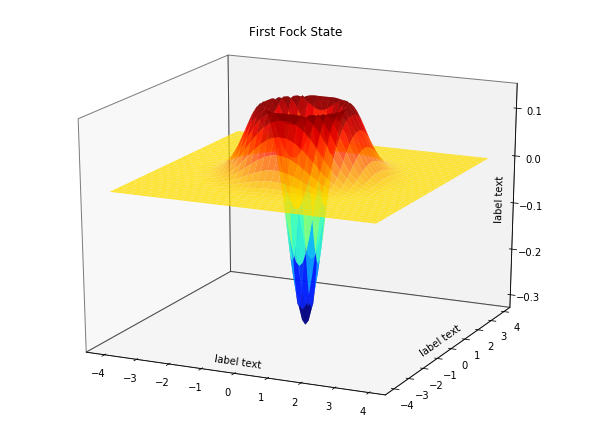

In [4]:
fig1, ax1 = myplotwigner(fockone, [-4,4], [-4,4], title='First Fock State')
ax1.view_init(elev=20, azim=-65) 

ax1.set_xlabel('label text', labelpad=-30)
ax1.set_ylabel('label text', labelpad=-30)
ax1.set_zlabel('label text', labelpad=-30)

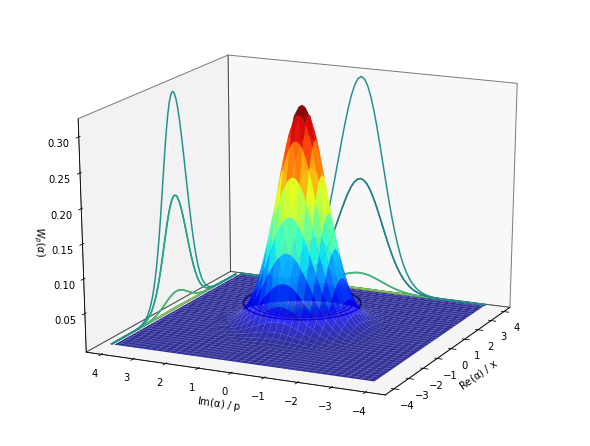

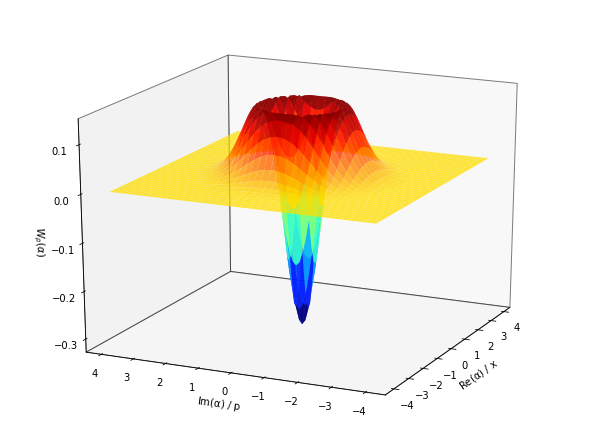

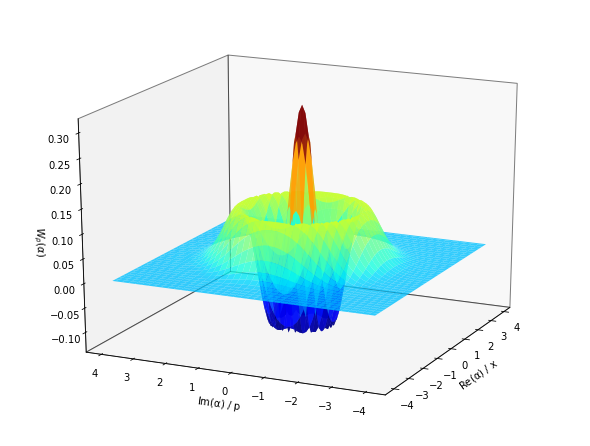

In [5]:
fig0, ax0 = myplotwigner(vac, [-4,4], [-4,4], cont=True)# , title='Vacuum State')
ax0.view_init(elev=20, azim=-65 - 90) 

fig1, ax1 = myplotwigner(fockone, [-4,4], [-4,4])# , title='First Fock State')
ax1.view_init(elev=20, azim=-65 - 90) 

fig2, ax2 = myplotwigner(focktwo, [-4,4], [-4,4])# , title='Second Fock State', fineness=80)
ax2.view_init(elev=20, azim=-65 - 90) 

fig0.savefig('fig/vac.pdf', format='pdf')
fig1.savefig('fig/fockone.pdf', format='pdf')
fig2.savefig('fig/focktwo.pdf', format='pdf')

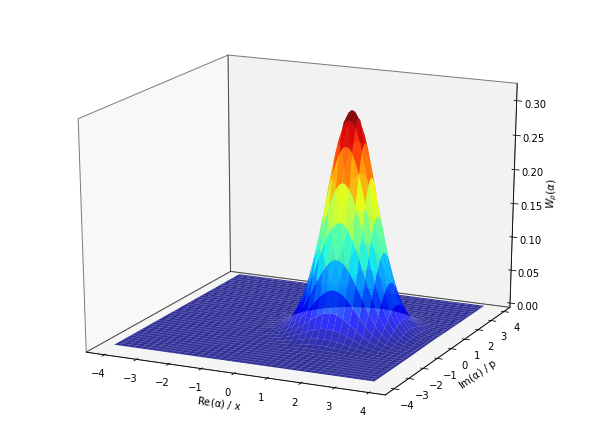

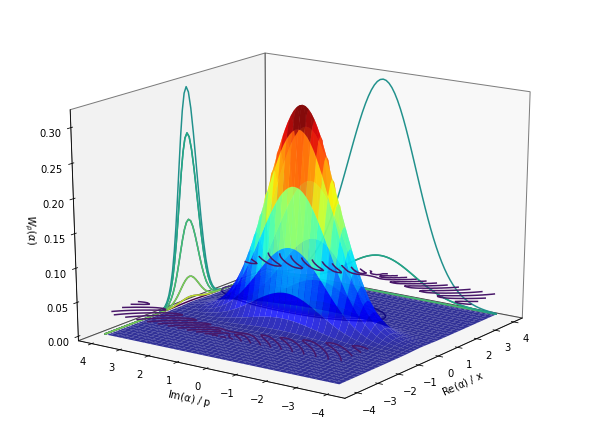

In [6]:
figcoh, axcoh = myplotwigner(coher, [-4,4], [-4,4])# , title='Coherent State')
axcoh.view_init(elev=20, azim=-65) 

figsqz, axsqz = myplotwigner(sqzvac, [-4,4], [-4,4], cont=True)# , title='Squeezed Vacuum State')
axsqz.view_init(elev=20, azim=-55 - 90) 

figcoh.savefig('fig/coher.pdf', format='pdf')
figsqz.savefig('fig/sqzvac.pdf', format='pdf')

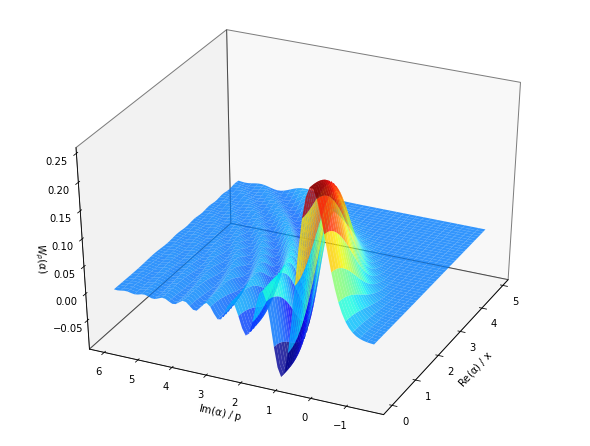

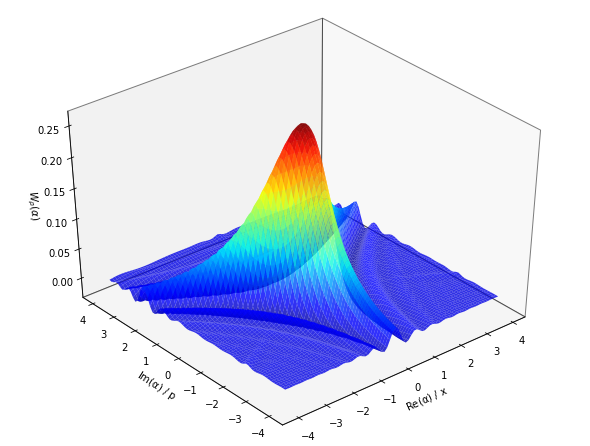

In [7]:
# CPS and TPS versions here
gamma1 = 0.05
r1 = 1
N2 = 200

figcub, axcub = myplotwigner(cubic(gamma1, r1, N2)[0], [0, 5], [-1.5, 6])
axcub.view_init(elev=35, azim=205) 

gamma2 = 0.15
r2 = 0.05

figtri, axtri = myplotwigner(innercubic(gamma2, r2, N2)[0], [-4,4], [-4,4], rccount=90)
axtri.view_init(elev=40, azim=230) 

figcub.savefig('fig/cubic.pdf', format='pdf')
figtri.savefig('fig/triple.pdf', format='pdf')

## Analytic / Numeric comparison for CPS

In [8]:
#Highest nmean in final plot at r = 1.302542 gamma = 0.071186
#Highest nmean in whole data set at gamma = 0.873418 r = 0.230769

In [9]:
# gamma = 0.071
# r = 1.30
gamma = 0.873418 
r = 0.230769
N = 150
cubestate , n = cubic(gamma, r, N)
print(n)

5.995804504620317


In [10]:
wlnnum = wln(cubestate, 1e-4, 400, 400 , [-9,9], [-15, 15])
wlnana = wlnanalytic(gamma, r, 1e-4, 400, 400)
print(wlnnum, wlnana)

(0.9926005449240025, 0.9998488796784617, 5.707804441452026, 30.433940649032593, [-10.0, 10.0], [-17.0, 17.5]) (0.8717894892709621, 0.9998410746815765, [-3.5, 3.5], [-4.5, 30.5])


In [11]:
q, p = np.linspace(-3,3, 200), np.linspace(-1.5,20, 200)

analy = wigcubic(q, p, gamma, r)
numer = wigner(cubestate, q, p)

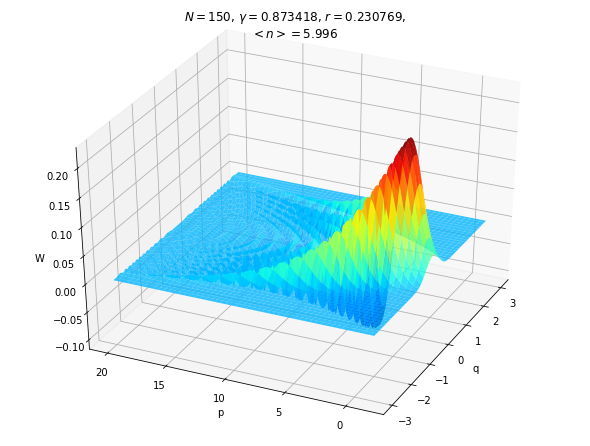

In [12]:
anafig, anaax = my3dplot(q,p,analy.real, fr'''$N = {N}$, $\gamma = {gamma}$, $r = {r}$,
$<n> = {n:.04}$''', ['q','p','W'], cmap='jet')
anaax.view_init(35,205)

anafig.savefig('fig/ana_cubic_2.pdf', format='pdf')

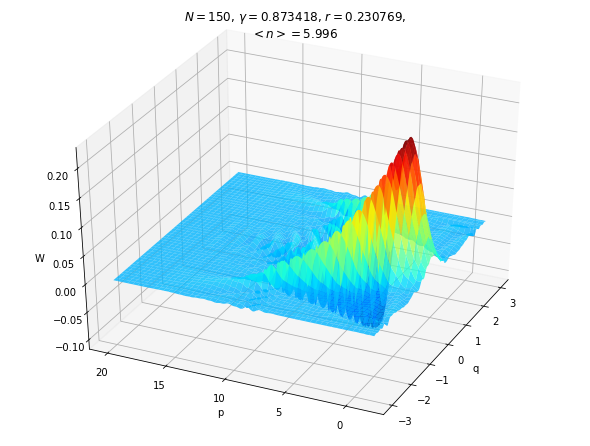

In [13]:
numfig, numax = my3dplot(q,p,numer.real, fr'''$N = {N}$, $\gamma = {gamma}$, $r = {r}$,
$<n> = {n:.04}$''', ['q','p','W'], cmap='jet')
numax.view_init(35,205)

numfig.savefig('fig/num_cubic_2.pdf', format='pdf')

In [14]:
numfig, numax = my3dplot(q, p, numer - analy, fr'''$N = {N}$, $\gamma = {gamma}$, $r = {r}$,
$<n> = {n:.04}$''', ['q','p', r'$W_{num} - W_{ana}$'], rccount=100, cmap='seismic')
# numax.set_xticks([])

numax.view_init(25,205)

numfig.savefig('fig/ana-num_comparison_3d_2.pdf')

TypeError: my3dplot() got an unexpected keyword argument 'fineness'

In [ ]:
figcont = plt.figure()
cp = plt.contourf(q, p, numer - analy, levels = 80, cmap='seismic')
plt.colorbar(cp)
plt.title(fr'''$N = {N}$, $\gamma = {gamma}$, $r = {r}$,
$<n> = {n:.04}$''')
plt.xlabel('q')
plt.ylabel('p')
figcont.savefig('fig/ana-num_comparison_2.pdf')

plt.show()

In [ ]:
numfig, numax = mycontourplot(q, p, numer.real, fr'''$N = {N}$, $\gamma = {gamma}$, $r = {r}$,
$<n> = {n:.04}$''', ['q','p'], cmap='jet')

In [ ]:
anafig, anaax = mycontourplot(q, p, analy.real, fr'''$N = {N}$, $\gamma = {gamma}$, $r = {r}$,
$<n> = {n:.04}$''', ['q','p'], cmap='jet')